#三軍總醫院北投分院統計及實驗設計課程之三
2021/6/26

##ytai1123@gmail.com
###使用方法:
使用gmail帳號登入
按"執行階段" -->"全部執行" 以執行全部內容,  

若要個別執行可點選每格程式左方箭頭或按 Control + Enter 鍵執行。

In [ ]:
##0-1
!git clone https://github.com/YuehMintTai/RPython.git

Cloning into 'RPython'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 90 (delta 39), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (90/90), done.


In [ ]:
##0-2
!pip install rpy2

In [ ]:
##0-3
%load_ext rpy2.ipython

In [ ]:
##0-4
%%R
myData<-read.csv('RPython/samples.csv')
tail(myData,1)


    SID 性別 年齡 入伍前職業 教育程度 婚姻狀況 皆無過去病史01 早產兒01
188   4    1   25         商        4        1              1        0
    頭部曾受傷01 發展遲緩01 注意力不足過動症01 癲癇01 癲癇服藥治療 癲癇服藥期間
188            0          0                  0      0            0            0
    軍種 軍階 役別 入伍至今_年 聽過自殺課程_次 求助心輔_次 求助精神科_次
188    1    1    2         0.5               1           0             2
    使用1995_次 使用24h專線_次 特殊狀況 父母婚姻狀態 自殺意念_bsrs6 B型肝炎01
188           0              0        4            4              4         0
    C型肝炎01 氣喘史01 過敏史01 心臟病史01 高血壓01 醣尿病01 甲狀腺01 類風濕01
188         0        1        1          0        0        0        1        0
    重大意外01 自殺意念01 透露父母 透露手足 透露好友 透露同儕 透露長官 透露心輔
188          1          1        0        0        0        0        0        0
    透露醫師 拒告父母 拒告手足 拒告好友 拒告同儕 拒告長官 拒告心輔 拒告醫師
188        0        1        1        1        1        1        1        1
    BSRS總分 BSRSR總分 過動症總分 Inattention Impulsivity opposition depression
188       20         5         18           9           

In [ ]:
##3-1
%%R
formula='網路成癮分數YDQ~家庭滿意度apgar+as.factor(性別)'
model1 <- glm(formula, myData, family='gaussian')
summary(model1)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6114  -2.0277  -0.8196   1.7421   5.9723  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.61143    0.45550   7.929 2.03e-13 ***
家庭滿意度apgar  -0.15837    0.05792  -2.734  0.00686 ** 
as.factor(性別)2 -1.06259    0.49946  -2.127  0.03470 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.747105)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1063.2  on 185  degrees of freedom
AIC: 867.25

Number of Fisher Scoring iterations: 2



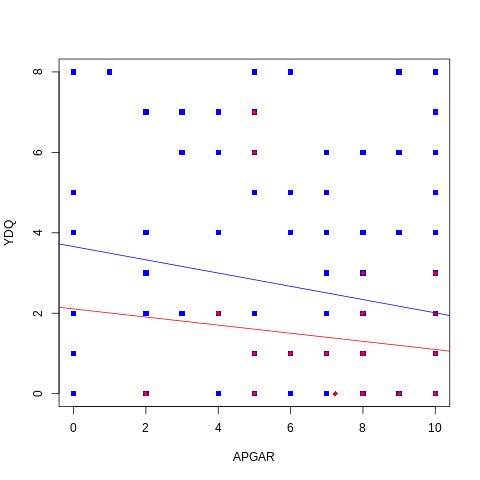

In [ ]:
##3-2
%%R 
male=subset(myData, 性別==1)
female=subset(myData, 性別==2)
plot(male$家庭滿意度apgar,male$網路成癮分數YDQ, col='blue',pch=15, xlab='APGAR', ylab='YDQ')
points(female$家庭滿意度apgar,female$網路成癮分數YDQ, col='red',pch=18)
abline(glm(網路成癮分數YDQ~家庭滿意度apgar, data=male), col='blue')
abline(glm(網路成癮分數YDQ~家庭滿意度apgar, data=female), col='red')

In [ ]:
##3-3
%%R
formula='網路成癮分數YDQ~家庭滿意度apgar+as.factor(性別)+家庭滿意度apgar*as.factor(性別)'
model2<-glm(formula, myData, family='gaussian')
summary(model2)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6574  -2.0095  -0.8334   1.7310   5.9905  

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       3.65736    0.47720   7.664    1e-12 ***
家庭滿意度apgar                  -0.16479    0.06121  -2.692  0.00776 ** 
as.factor(性別)2                 -1.55060    1.55641  -0.996  0.32043    
家庭滿意度apgar:as.factor(性別)2  0.06402    0.19332   0.331  0.74091    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.774898)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1062.6  on 184  degrees of freedom
AIC: 869.14

Number of Fisher Scoring iterations: 2



In [ ]:
##3-3-1
%%R
formula='網路成癮分數YDQ~家庭滿意度apgar+性別+家庭滿意度apgar*性別'
model2<-glm(formula, myData, family='gaussian')
summary(model2)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6574  -2.0095  -0.8334   1.7310   5.9905  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)           5.20796    1.76226   2.955  0.00353 **
家庭滿意度apgar      -0.22880    0.22049  -1.038  0.30076   
性別                 -1.55060    1.55641  -0.996  0.32043   
家庭滿意度apgar:性別  0.06402    0.19332   0.331  0.74091   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.774898)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1062.6  on 184  degrees of freedom
AIC: 869.14

Number of Fisher Scoring iterations: 2



In [ ]:
##3-4
%%R
formula='網路成癮分數YDQ~家庭滿意度apgar+年齡'
model2<-glm(formula, myData, family='gaussian')
summary(model2)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5674  -1.8336  -0.7965   1.8062   6.3314  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.32133    1.04574   4.132 5.44e-05 ***
家庭滿意度apgar -0.17338    0.05907  -2.935  0.00375 ** 
年齡            -0.03534    0.04109  -0.860  0.39080    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.864259)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1084.9  on 185  degrees of freedom
AIC: 871.05

Number of Fisher Scoring iterations: 2



In [ ]:
##3-5
%%R
formula='網路成癮分數YDQ~家庭滿意度apgar+anxiety'
model2<-glm(formula, myData, family='gaussian')
summary(model2)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.4029  -1.6351  -0.8669   1.7393   5.9706  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      1.18438    0.85130   1.391  0.16582   
家庭滿意度apgar -0.12145    0.05861  -2.072  0.03962 * 
anxiety          0.06916    0.02153   3.212  0.00156 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.576771)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1031.7  on 185  degrees of freedom
AIC: 861.6

Number of Fisher Scoring iterations: 2



In [ ]:
##3-6-1
%%R
install.packages("scatterplot3d")
library('scatterplot3d')


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/scatterplot3d_0.3-41.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 460912 bytes (450 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =

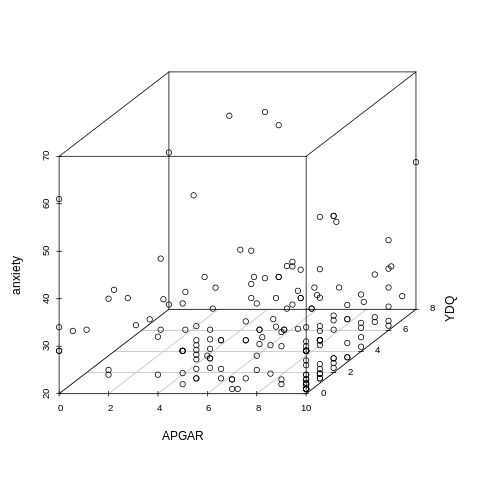

In [ ]:
##3-6-2
%%R
scatterplot3d(myData$家庭滿意度apgar,myData$網路成癮分數YDQ,myData$anxiety, xlab='APGAR', ylab='YDQ', zlab='anxiety')
abline(glm(網路成癮分數YDQ~家庭滿意度apgar+anxiety, data=male), col='blue', lwd=2, type='1')

In [ ]:
##3-7
%%R
formula='網路成癮分數YDQ~家庭滿意度apgar+anxiety+家庭滿意度apgar*anxiety'
model2<-glm(formula, myData, family='gaussian')
summary(model2)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0797  -1.6819  -0.8761   1.7412   5.9368  

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)              1.539326   1.473788   1.044    0.298
家庭滿意度apgar         -0.175972   0.193686  -0.909    0.365
anxiety                  0.058039   0.043382   1.338    0.183
家庭滿意度apgar:anxiety  0.001774   0.006005   0.295    0.768

(Dispersion parameter for gaussian family taken to be 5.604422)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1031.2  on 184  degrees of freedom
AIC: 863.51

Number of Fisher Scoring iterations: 2



In [ ]:
##3-8
%%R
myData$注意力不足過動症01<-as.integer(myData$注意力不足過動症01)
formula='網路成癮分數YDQ~as.factor(性別)+年齡+家庭滿意度apgar+as.factor(注意力不足過動症01)'
formula=paste(formula,'+anxiety+depression+過動症總分+睡眠困擾_bsrs1')
model2<-glm(formula, myData, family='gaussian')
summary(model2)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-5.324  -1.568  -0.524   1.366   6.512  

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)  
(Intercept)                     2.12876    1.13825   1.870   0.0631 .
as.factor(性別)2               -1.02656    0.48352  -2.123   0.0351 *
年齡                           -0.06828    0.04005  -1.705   0.0900 .
家庭滿意度apgar                -0.05140    0.06128  -0.839   0.4027  
as.factor(注意力不足過動症01)1  0.26978    0.96693   0.279   0.7806  
anxiety                         0.03745    0.02404   1.558   0.1211  
depression                      0.04952    0.02100   2.359   0.0194 *
過動症總分                      0.04383    0.01921   2.282   0.0237 *
睡眠困擾_bsrs1                 -0.14922    0.20412  -0.731   0.4657  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.129394)

    Null